# 🎀 Analysis of Female-Led ("Girly") TV Shows on Netflix

This notebook focuses on identifying and analyzing female-led TV shows on Netflix
using descriptive data analysis techniques.

## 1. Dataset Structure

In this step, we examine the overall structure of the dataset,
including its size, columns, and data types.

In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

In [418]:
df = pd.read_csv("../data/raw/netflix_titles.csv")

## 1. Dataset Size

Before starting the analysis, we check the number of rows and columns
to understand the scale of the dataset.

In [419]:
df.shape

(8807, 12)

## 2. Column Overview

In this step, we list all columns in the dataset
to understand what information is available for analysis.

In [420]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## 3. Data Types and Missing Values

In this section, we inspect data types and identify missing values
to assess data quality before deeper analysis.

In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 4. Missing Values Overview

This step shows the exact number of missing values in each column,
allowing us to identify problematic fields.

In [422]:
df.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

## 5. Handling Missing Cast Information

Since identifying female-led TV shows requires cast information,
titles with missing cast data are excluded from further analysis.

This is a conscious analytical decision to ensure accuracy,
rather than making assumptions or imputations.

In [423]:
df_clean= df.dropna(subset=["cast"])

In [424]:
df_clean.shape

(7982, 12)

## 6. Filtering Only TV Shows

To keep the analysis focused and consistent,
we limit the dataset to TV Shows only.
Movies are excluded since character-centric analysis
is more meaningful for series.

In [425]:
df_tv = df_clean[df_clean["type"] == "TV Show"]

In [426]:
df_tv.shape

(2326, 12)

## 7. Defining Female-Led TV Shows

Since the dataset does not explicitly indicate the gender of main characters,
we define a TV show as *female-led* if the first listed cast member
has a female first name.

This heuristic provides a simple and transparent approximation
suitable for an exploratory analysis.

In [427]:
df_tv = df_clean[df_clean["type"] == "TV Show"].copy()

In [428]:
df_tv["main_actor"] = df_tv["cast"].str.split(",").str[0]

In [429]:
df_tv[["cast", "main_actor"]].head()

,cast,main_actor
1,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",Ama Qamata
2,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Sami Bouajila
4,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",Mayur More
5,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Kate Siegel
8,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",Mel Giedroyc


## 8. Identifying Female-Led TV Shows

To classify TV shows as female-led, we compare the first name
of the main actor against a predefined list of common female names.

This rule-based approach provides a transparent and interpretable
method suitable for a junior-level exploratory analysis.

In [430]:
female_names = [
    "Jessica", "Emily", "Sarah", "Emma", "Olivia", "Sophia", "Anna",
    "Millie", "Elizabeth", "Jennifer", "Rachel", "Claire", "Lucy",
    "Lily", "Grace", "Natalie", "Victoria", "Zoe", "Amy", "Kate"
]

In [431]:
df_tv["first_name"] = df_tv["main_actor"].str.split().str[0]

In [432]:
df_tv[["main_actor", "first_name"]].head()

,main_actor,first_name
1,Ama Qamata,Ama
2,Sami Bouajila,Sami
4,Mayur More,Mayur
5,Kate Siegel,Kate
8,Mel Giedroyc,Mel


In [433]:
df_tv["female_led"] = df_tv["first_name"].isin(female_names)

In [434]:
df_tv["female_led"].value_counts()

female_led
False    2251
True       75
Name: count, dtype: int64

## 9. Defining "Girly" TV Shows Based on Genres 💅

Since "girly" is not an official Netflix genre, we define girly TV shows
as those that fall into genres commonly associated with female-centered
storytelling, such as romance, teen drama, and character-driven narratives.

This definition is used as a thematic approximation for exploratory analysis.

In [435]:
girly_genres = [
    "Romantic TV Shows",
    "Teen TV Shows",
    "TV Dramas",
    "TV Comedies",
    "Reality TV"
]

In [436]:
df_tv["is_girly"] = df_tv["listed_in"].apply(
    lambda x: any(genre in x for genre in girly_genres)
)

In [437]:
df_tv["is_girly"].value_counts()

is_girly
True     1509
False     817
Name: count, dtype: int64

In [438]:
girly_female_led = df_tv[
    (df_tv["female_led"] == True) &
    (df_tv["is_girly"] == True)
]

In [439]:
girly_female_led.shape

(48, 16)

In [440]:
girly_female_led.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_actor,first_name,female_led,is_girly
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...,Kate Siegel,Kate,True,True
222,s223,TV Show,Clickbait,Brad Anderson,"Zoe Kazan, Betty Gabriel, Adrian Grenier, Phoe...",NaN,"August 25, 2021",2021,TV-MA,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries",When family man Nick Brewer is abducted in a c...,Zoe Kazan,Zoe,True,True
477,s478,TV Show,Atypical,NaN,"Jennifer Jason Leigh, Keir Gilchrist, Michael ...",United States,"July 9, 2021",2021,TV-14,4 Seasons,"TV Comedies, TV Dramas, Teen TV Shows",When a teen on the autism spectrum decides to ...,Jennifer Jason Leigh,Jennifer,True,True
638,s639,TV Show,Sex/Life,NaN,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ...",United States,"June 25, 2021",2021,TV-MA,1 Season,"Romantic TV Shows, TV Dramas",A woman's daring sexual past collides with her...,Sarah Shahi,Sarah,True,True
749,s750,TV Show,L.A.’s Finest,NaN,"Jessica Alba, Gabrielle Union",United States,"June 9, 2021",2021,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Come...","In this spinoff of the ""Bad Boys"" franchise, t...",Jessica Alba,Jessica,True,True


### 9.1 Refining the "Girly" Genre Definition 💅

After inspecting the initial results, some titles classified as "girly"
did not align with the intended theme. Therefore, the genre definition
was refined by excluding broad categories such as general TV dramas.

This adjustment improves thematic precision while maintaining
a transparent and iterative analytical approach.

In [441]:
girly_genres_refined = [
    "Romantic TV Shows",
    "Teen TV Shows",
    "TV Comedies",
    "Reality TV"
]

In [442]:
df_tv["is_girly"] = df_tv["listed_in"].apply(
    lambda x: any(genre in x for genre in girly_genres_refined)
)

In [443]:
girly_female_led = df_tv[
    (df_tv["female_led"] == True) &
    (df_tv["is_girly"] == True)
]

In [444]:
df_tv["is_girly"].value_counts()


is_girly
False    1336
True      990
Name: count, dtype: int64

In [445]:
girly_female_led.shape

(27, 16)

In [446]:
girly_female_led.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,main_actor,first_name,female_led,is_girly
477,s478,TV Show,Atypical,NaN,"Jennifer Jason Leigh, Keir Gilchrist, Michael ...",United States,"July 9, 2021",2021,TV-14,4 Seasons,"TV Comedies, TV Dramas, Teen TV Shows",When a teen on the autism spectrum decides to ...,Jennifer Jason Leigh,Jennifer,True,True
638,s639,TV Show,Sex/Life,NaN,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ...",United States,"June 25, 2021",2021,TV-MA,1 Season,"Romantic TV Shows, TV Dramas",A woman's daring sexual past collides with her...,Sarah Shahi,Sarah,True,True
749,s750,TV Show,L.A.’s Finest,NaN,"Jessica Alba, Gabrielle Union",United States,"June 9, 2021",2021,TV-MA,2 Seasons,"Crime TV Shows, TV Action & Adventure, TV Come...","In this spinoff of the ""Bad Boys"" franchise, t...",Jessica Alba,Jessica,True,True
1375,s1376,TV Show,BONDING,NaN,"Zoe Levin, Brendan Scannell, Micah Stock, Theo...",United States,"January 27, 2021",2021,TV-MA,2 Seasons,"TV Comedies, TV Dramas",A New York City grad student moonlighting as a...,Zoe Levin,Zoe,True,True
1848,s1849,TV Show,Half & Half,NaN,"Rachel True, Essence Atkins, Telma Hopkins, Ch...",United States,"October 15, 2020",2005,TV-14,4 Seasons,TV Comedies,After two estranged half-sisters in their twen...,Rachel True,Rachel,True,True


### 9.2 Adding Description-Based Keyword Filtering 💅

After applying the initial "girly" definition based on female-led status
and genre alignment, the resulting TV shows did not sufficiently reflect
the intended concept of "girly" content.

Many series technically met the genre criteria but lacked themes such as
relationships, friendship, lifestyle, or female personal narratives.

To address this limitation, an additional rule was introduced:
the show description must contain predefined "girly" thematic keywords.

This step refines the classification by incorporating narrative context,
thereby improving thematic accuracy.

### 9.3 Implementing Description-Based Keyword Matching 💅

In this step, TV show descriptions are analyzed to identify whether they
contain thematic keywords associated with "girly" content.

This approach adds narrative context to the classification process by
considering how the story is described, rather than relying solely on
structural metadata such as genre.

In [447]:
girly_keywords = [
    "love", "romance", "romantic",
    "relationship", "dating", "sex",
    "girlfriend", "boyfriend",
    "fashion", "style",
    "career", "dream",
    "friendship", "friends",
    "life", "personal",
    "woman", "female"
]

In [448]:
girly_female_led = girly_female_led.copy()

In [449]:
girly_female_led["description_lower"] = (
    girly_female_led["description"].str.lower()
)

In [450]:
girly_female_led["description_match"] = (
    girly_female_led["description_lower"]
    .apply(lambda x: any(k in x for k in girly_keywords))
)

In [451]:
girly_female_led["description_match"].value_counts()

description_match
False    16
True     11
Name: count, dtype: int64

### 9.4 Creating the Final "is_girly" Classification 💅✨

After refining the dataset using genre, female-led status, and
description-based keyword matching, a final binary classification
is created.

A TV show is labeled as "girly" only if it satisfies all defined
criteria, ensuring high thematic precision.

In [452]:
girly_female_led["is_girly_final"] = (
    girly_female_led["description_match"] == True
)

girly_female_led["is_girly_final"].value_counts()

is_girly_final
False    16
True     11
Name: count, dtype: int64

In [453]:
girly_female_led[girly_female_led["is_girly_final"] == True][
    ["title", "listed_in", "description","cast"]
].head(10)

,title,listed_in,description,cast
477,Atypical,"TV Comedies, TV Dramas, Teen TV Shows",When a teen on the autism spectrum decides to ...,"Jennifer Jason Leigh, Keir Gilchrist, Michael ..."
638,Sex/Life,"Romantic TV Shows, TV Dramas",A woman's daring sexual past collides with her...,"Sarah Shahi, Mike Vogel, Adam Demos, Margaret ..."
1894,Emily in Paris,"Romantic TV Shows, TV Comedies, TV Dramas","After landing her dream job in Paris, Chicago ...","Lily Collins, Philippine Leroy-Beaulieu, Ashle..."
3108,Private Practice,"TV Comedies, TV Dramas","At Oceanside Wellness Center, Dr. Addison Mont...","Kate Walsh, Tim Daly, Audra McDonald, Paul Ade..."
3920,Crazy Ex-Girlfriend,"Romantic TV Shows, TV Comedies","Still pining for Josh, the boy who dumped her ...","Rachel Bloom, Vincent Rodriguez III, Santino F..."
4570,Hot Date,"Romantic TV Shows, TV Comedies",Interconnected sketches and performances skewe...,"Emily Axford, Brian Murphy"
5392,Barbie Life in the Dreamhouse,"Kids' TV, TV Comedies",Join blond icon Barbie and her fabulous friend...,"Kate Higgins, Sean Hankinson, Haviland Stillwe..."
5421,Young & Hungry,TV Comedies,A female food blogger is hired as a personal c...,"Emily Osment, Kym Whitley, Rex Lee, Jonathan S..."
5692,Lost & Found Music Studios,"Kids' TV, TV Comedies, TV Dramas",Teen singers-songwriters in an elite music pro...,"Victoria Baldesarra, Sarah Carmosino, Jordan C..."
6806,Friends,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ..."


### 9.5 Finalizing the "Girly" Definition 💅✨

At this stage, the rule-based definition of "girly" TV shows is finalized.

The current classification strikes a balance between thematic relevance
and recall, prioritizing female-centered narratives while avoiding
overly restrictive filters that could exclude valid titles.

A small number of known false positives (e.g., *Atypical*) remain due to
metadata-driven heuristics such as cast ordering and genre overlap.
These cases are intentionally retained and documented as methodological
limitations rather than corrected through additional complexity.

With the definition locked, the analysis proceeds using the finalized
`is_girly_final` label.

## 10. High-Level Overview: Girly Content on Netflix 💅✨

After finalizing the definition of "girly" TV shows, this section provides
a high-level overview of their presence within Netflix’s overall TV show catalog.

The goal is to understand:
- How many TV shows are classified as girly
- What proportion they represent among all TV shows
- Whether girly content is a niche or a significant segment on the platform

This overview sets the foundation for deeper temporal, genre-based,
and regional analyses in subsequent sections.

In [454]:
total_tv_shows = df_tv.shape[0]
girly_count = girly_female_led["is_girly_final"].sum()

total_tv_shows, girly_count

(2326, np.int64(11))

In [455]:
girly_ratio = girly_count / total_tv_shows * 100
girly_ratio

np.float64(0.4729148753224419)

In [456]:
print(f"Total TV Shows on Netflix: {total_tv_shows}")
print(f"Girly TV Shows: {girly_count}")
print(f"Girly Content Ratio: %{girly_ratio:.2f}")

Total TV Shows on Netflix: 2326
Girly TV Shows: 11
Girly Content Ratio: %0.47


### Key Findings

Out of 2,326 TV shows available on Netflix, only 11 titles
(~0.47%) meet the finalized criteria for "girly" content.

This relatively small proportion reflects the intentionally
strict and precision-oriented definition applied in this analysis.
Rather than aiming for broad coverage, the focus is on identifying
strongly female-centered narratives aligned with romantic, teen,
and character-driven themes.

As a result, the findings highlight "girly" content as a niche
yet clearly identifiable segment within Netflix’s TV catalog.

## 11. Temporal Analysis: When Did Girly Content Appear? 💅✨

After identifying a small but thematically strong set of "girly" TV shows,
this section examines their temporal distribution.

The objective is to understand:
- In which years girly TV shows were released
- Whether girly content is a recent phenomenon
- If there is any visible concentration in specific time periods

This analysis helps contextualize girly content within Netflix’s
broader content expansion timeline.


In [457]:
girly_by_year = (
    girly_female_led[girly_female_led["is_girly_final"] == True]
    .groupby("release_year")
    .size()
    .reset_index(name="girly_show_count")
    .sort_values("release_year")
)

girly_by_year

,release_year,girly_show_count
0,2003,1
1,2009,1
2,2012,2
3,2016,1
4,2017,1
5,2018,1
6,2019,1
7,2020,1
8,2021,2


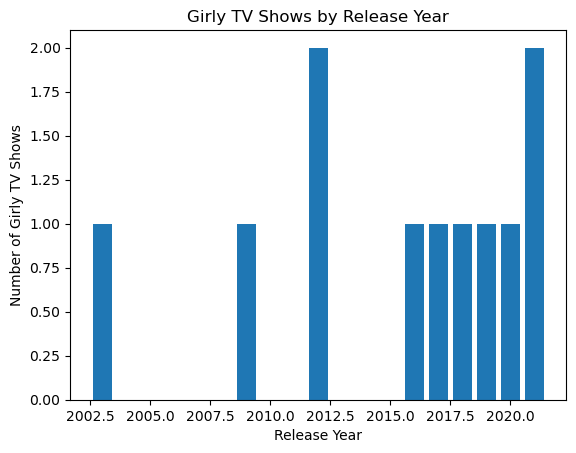

In [458]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(
    girly_by_year["release_year"],
    girly_by_year["girly_show_count"]
)
plt.xlabel("Release Year")
plt.ylabel("Number of Girly TV Shows")
plt.title("Girly TV Shows by Release Year")
plt.show()

### Temporal Insights

The temporal distribution of girly TV shows reveals a sparse and irregular
presence prior to 2012, with only isolated titles appearing in earlier years.

From 2016 onward, girly content shows a more consistent pattern, with at least
one title released each year through 2021. While the absolute numbers remain
low, this sustained presence suggests a gradual but intentional inclusion of
female-centered, girly narratives within Netflix’s expanding original content
strategy.

Rather than a sudden surge, the data points to steady and deliberate growth.

## 12. Genre Distribution of Girly TV Shows

This section analyzes the genre composition of girly TV shows in order to
understand how Netflix categorizes and presents female-centered narratives
within its broader content taxonomy.

Since Netflix assigns multiple genres to a single TV show, this analysis
does not aim to identify a dominant genre per show. Instead, it examines
the overall frequency of genre labels used for girly TV shows in order
to reveal Netflix’s content categorization strategy for female-centered
narratives.

In [459]:
# Filter girly TV shows
girly_shows = girly_female_led[girly_female_led["is_girly_final"] == True]

# Split multiple genres into individual rows
genre_series = (
    girly_shows["listed_in"]
    .str.split(", ")
    .explode()
)

# Count genre frequencies
genre_counts = genre_series.value_counts().reset_index()
genre_counts.columns = ["genre", "count"]

genre_counts

,genre,count
0,TV Comedies,9
1,TV Dramas,6
2,Romantic TV Shows,5
3,Kids' TV,2
4,Teen TV Shows,1
5,Classic & Cult TV,1


<Axes: title={'center': 'Genre Distribution of Girly TV Shows'}, xlabel='genre'>

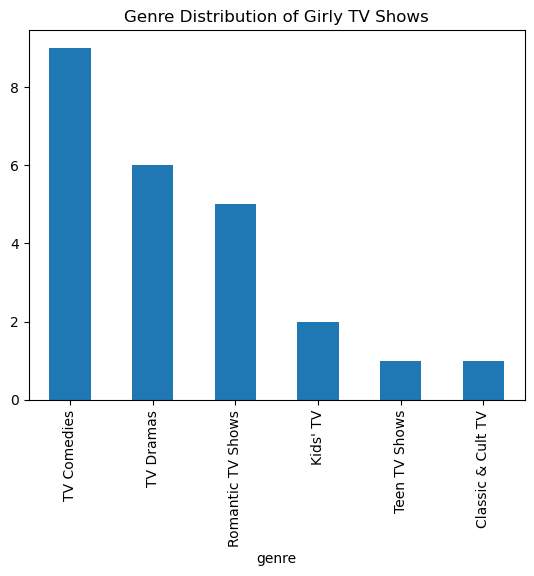

In [460]:
genre_counts.plot(
    kind="bar",
    x="genre",
    y="count",
    title="Genre Distribution of Girly TV Shows",
    legend=False
)

### Interpretation

The genre distribution shows that "girly" TV shows on Netflix are most
commonly associated with comedies, dramas, and romantic content.
This indicates that girly narratives are primarily character-driven,
emotion-focused, and relationship-oriented rather than plot-heavy or
action-based.

The presence of Teen and Kids’ TV genres suggests that girly content
also targets younger audiences, extending beyond adult romantic themes.
Overall, the distribution supports the validity of the genre-based
filtering approach used in this analysis.

## 13. Country Analysis — Where Does Girly Content Come From? 💅🌍

This step explores the geographical distribution of "girly" TV shows
available on Netflix.

Since a single TV show can be associated with multiple countries,
the country information is split and analyzed at an individual country level.
The goal is to identify which regions contribute most to girly-themed content.

In [461]:
girly_countries = (
    girly_female_led[girly_female_led["is_girly_final"] == True]
    .assign(country=lambda x: x["country"].str.split(", "))
    .explode("country")
)

girly_countries["country"].value_counts()

country
United States    10
Canada            3
Name: count, dtype: int64

### Key Insights

- The majority of girly TV shows originate from the United States,
  highlighting Netflix’s strong reliance on US-based storytelling
  for female-centered narratives.

- Canada appears mainly as a co-production partner rather than a primary producer.

- The absence of European countries suggests that girly-themed content
  is more aligned with North American production styles and audience targeting.